In [53]:
import numpy as np
import dxchange
import matplotlib.pyplot as plt
import cupy as cp
import scipy.ndimage as ndimage
import numpy as np
import sys
from matplotlib_scalebar.scalebar import ScaleBar
%matplotlib inline

In [54]:
n = 256  # object size in each dimension
ntheta = 540  # number of angles (rotations)
center = n/2 # rotation axis
theta = cp.linspace(0, np.pi, ntheta,endpoint=False).astype('float32')  # projection angles
npos = 3  # number of code positions
detector_pixelsize = 3e-6*0.5
energy = 33.35  # [keV] xray energy
wavelength = 1.2398419840550367e-09/energy  # [m] wave length
focusToDetectorDistance = 1.28  # [m]
sx0 = 3.7e-4
z1 = np.array([4.584e-3, 4.765e-3, 5.488e-3, 6.9895e-3])[:npos]-sx0
# z1 = np.tile(z1, [npos])
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance
magnifications = focusToDetectorDistance/z1
voxelsize = detector_pixelsize/magnifications[0]*2048/n  # object voxel size
norm_magnifications = magnifications/magnifications[0]
# scaled propagation distances due to magnified probes
distances = distances*norm_magnifications**2

z1p = 12e-3  # positions of the code and the probe for reconstruction
z2p = z1-np.tile(z1p, len(z1))
# magnification when propagating from the probe plane to the detector
magnifications2 = z1/z1p
# propagation distances after switching from the point source wave to plane wave,
distances2 = (z1p*z2p)/(z1p+z2p)
norm_magnifications2 = magnifications2/(z1p/z1[0])  # normalized magnifications
# scaled propagation distances due to magnified probes
distances2 = distances2*norm_magnifications2**2
distances2 = distances2*(z1p/z1)**2

# allow padding if there are shifts of the probe
pad = n//8
# sample size after demagnification
ne = n+2*pad

show = True

flg = f'{n}_{ntheta}_{npos}_{z1p}_0deg'

In [55]:
detector_pixelsize*2048/256
m=512

In [56]:
z1p = 12e-3  # positions of the code and the probe for reconstruction
u = np.load('data/u.npy').real


flg = f'{n}_{180}_{1}_{z1p}_0deg'
rec_c_180 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')

conv_c_180 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_c_180 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_c_180.shape
    a = -rec_c_180[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_c_180[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)

flg = f'{n}_{360}_{1}_{z1p}_0deg'
conv_c_360 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_c_360 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_c_360.shape    
    a = -rec_c_360[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_c_360[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)

rec_c_360 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
# conv_c_360 = np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')

flg = f'{n}_{540}_{1}_{z1p}_0deg'
conv_c_540 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_c_540 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_c_540.shape    
    a = -rec_c_540[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_c_540[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)

rec_c_540 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
# conv_c_540 = np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')

z1p = 4.21e-03
flg = f'{n}_{180}_{1}_{z1p:.2e}_conv'
rec_1 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
conv_1 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_1 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_1.shape    
    a = -rec_1[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_1[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)


flg = f'{n}_{180}_{2}_{z1p:.2e}_conv'
rec_2 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
conv_2 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_2 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_2.shape    
    a = -rec_2[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_2[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)


flg = f'{n}_{180}_{3}_{z1p:.2e}_conv'
rec_3 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
conv_3 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_3 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_3.shape    
    a = -rec_3[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_3[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)




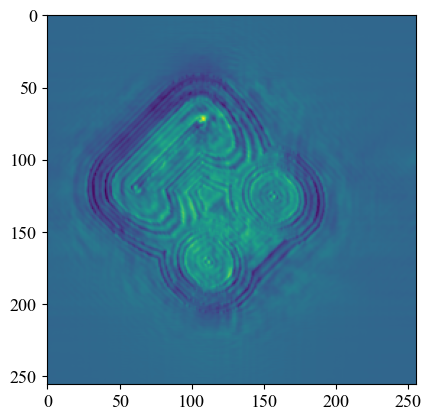

In [57]:
plt.imshow(a-b)

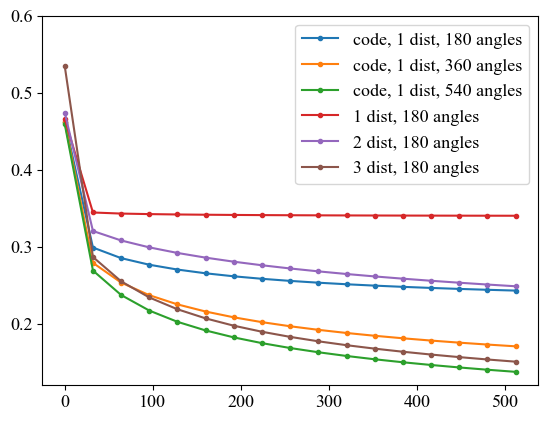

In [58]:
import matplotlib
font = {'family' : 'Times New Roman',
        'size'   : 13}

matplotlib.rc('font', **font)

# xp
x = np.arange(0,m+1,32)
# conv_c_180 = interp()
plt.plot(x,conv_c_180[:],'.-',label='code, 1 dist, 180 angles')
plt.plot(x,conv_c_360[:],'.-',label='code, 1 dist, 360 angles')
plt.plot(x,conv_c_540[:],'.-',label='code, 1 dist, 540 angles')
plt.plot(x,conv_1[:],'.-',label='1 dist, 180 angles')
plt.plot(x,conv_2[:],'.-',label='2 dist, 180 angles')
plt.plot(x,conv_3[:],'.-',label='3 dist, 180 angles')
plt.ylim([0.12,0.6])# plt.yscale('log')
plt.legend()
plt.savefig(f'figs/nonoise.png',dpi=300,bbox_inches='tight')



In [59]:
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
vvmin = -3e-7
vvmax = 2.4e-6
u0 = u[:,128+2]
def mshow(a,**args):
    aa=a.copy()
    aa[0,0]=vvmin
    aa[0,1]=vvmax
    plt.imshow(aa,**args)

def mshowfull(u):
    fig, ax = plt.subplots(figsize=(3,3))
    shape = u.shape
    im = ax.imshow(-u[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128],cmap='gray',vmax=vvmax,vmin=vvmin)
    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
            "family": "serif",
        },  # For more information, see the cell below
        location="lower right")
    ax.add_artist(scalebar)
    # ax.tick_params(axis='both', which='major', labelsize=11)
    
    # divider = make_axes_locatable(ax)
    # cax = divider.append_axes('right', size='5%', pad=0.1)
    # cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    # cbar.ax.tick_params(labelsize=12)
    uu = -u[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    ins_ax = ax.inset_axes([0.5, 0.5, .5, .5])  # [x, y, width, height] w.r.t. ax
    uu = uu[50:102,80:132]
    uu[:,:1] = vvmax
    uu[-1:,:] = vvmax
    
    ins_ax.imshow(uu,cmap='gray',vmax=vvmax,vmin=vvmin)
    ins_ax.axis('off')
    a = -u[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u0
    mssim = np.linalg.norm(a-b)/np.linalg.norm(b)
    # ax.add_artist(scalebar)
    # ax.tick_params(axis='both', which='major', labelsize=11)
    if mssim>0.001:
        ax.text(5,250,f'error: {mssim:.3f}',fontsize=19,color='white')

    # plt.show()


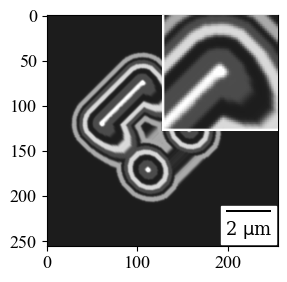

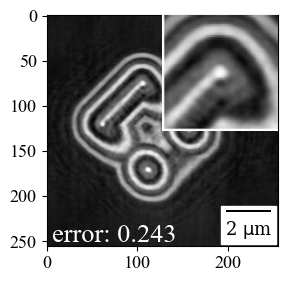

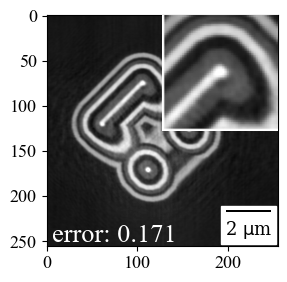

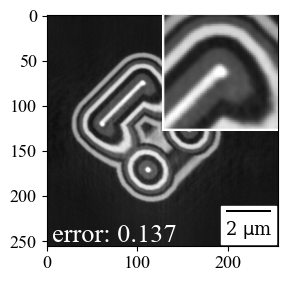

In [60]:

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

mshowfull(u[:,128+2])
plt.savefig(f'figs/u.png',dpi=300,bbox_inches='tight')
mshowfull(rec_c_180)
plt.savefig(f'figs/rec_c_180.png',dpi=300,bbox_inches='tight')
mshowfull(rec_c_360)
plt.savefig(f'figs/rec_c_360.png',dpi=300,bbox_inches='tight')
mshowfull(rec_c_540)
plt.savefig(f'figs/rec_c_540.png',dpi=300,bbox_inches='tight')


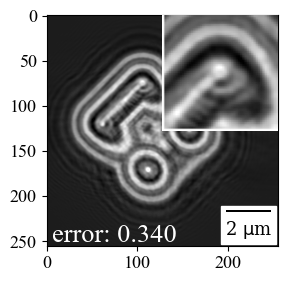

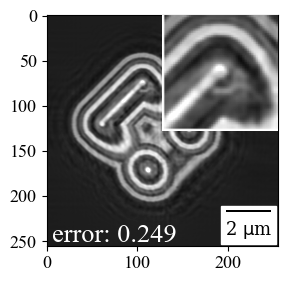

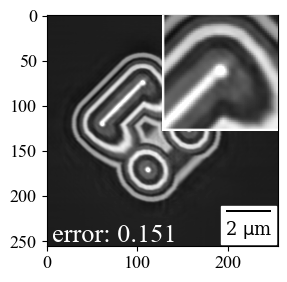

In [61]:
mshowfull(rec_1)
plt.savefig(f'figs/rec_1.png',dpi=300,bbox_inches='tight')
mshowfull(rec_2)
plt.savefig(f'figs/rec_2.png',dpi=300,bbox_inches='tight')
mshowfull(rec_3)
plt.savefig(f'figs/rec_3.png',dpi=300,bbox_inches='tight')

In [62]:
z1p = 12e-3  # positions of the code and the probe for reconstruction
u = np.load('data/u.npy').real

post = 'True3'
flg = f'{n}_{180}_{1}_{z1p}_{post}_0deg'
rec_c_180 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')

conv_c_180 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_c_180 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_c_180.shape
    a = -rec_c_180[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_c_180[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)

flg = f'{n}_{360}_{1}_{z1p}_{post}_0deg'
conv_c_360 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_c_360 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_c_360.shape    
    a = -rec_c_360[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_c_360[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)

rec_c_360 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
# conv_c_360 = np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')

flg = f'{n}_{540}_{1}_{z1p}_{post}_0deg'
conv_c_540 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_c_540 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_c_540.shape    
    a = -rec_c_540[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_c_540[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)

rec_c_540 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
# conv_c_540 = np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')

z1p = 4.21e-03
flg = f'{n}_{180}_{1}_{z1p:.2e}_{post}_conv'
rec_1 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
conv_1 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_1 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_1.shape    
    a = -rec_1[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_1[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)


flg = f'{n}_{180}_{2}_{z1p:.2e}_{post}_conv'
rec_2 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
conv_2 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_2 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_2.shape    
    a = -rec_2[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_2[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)


flg = f'{n}_{180}_{3}_{z1p:.2e}_{post}_conv'
rec_3 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{m:03}.tiff')
conv_3 = np.zeros(m//32+1)#np.load(f'/data2/vnikitin/coded_apertures_new/conv_{flg}.npy')
for k in range(0,m+1,32):
    rec_3 = dxchange.read_tiff(f'/data2/vnikitin/coded_apertures_new/u_{flg}/{k:03}.tiff')
    shape = rec_3.shape    
    a = -rec_3[shape[0]//2-128:shape[0]//2+128,shape[1]//2-128:shape[1]//2+128]
    b = -u[:,u.shape[1]//2+2]
    conv_3[k//32] = np.linalg.norm(a-b)/np.linalg.norm(b)


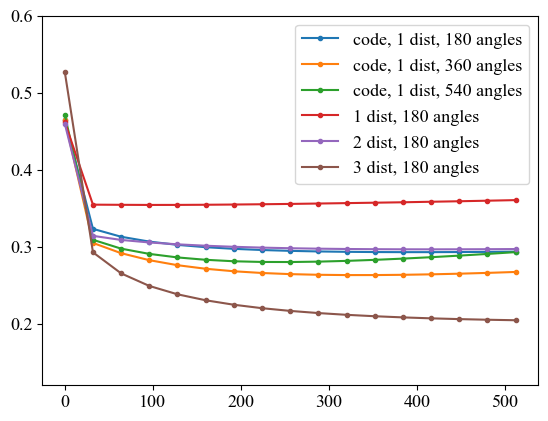

In [63]:

# xp
x = np.arange(0,m+1,32)
# conv_c_180 = interp()
plt.plot(x,conv_c_180[:],'.-',label='code, 1 dist, 180 angles')
plt.plot(x,conv_c_360[:],'.-',label='code, 1 dist, 360 angles')
plt.plot(x,conv_c_540[:],'.-',label='code, 1 dist, 540 angles')
plt.plot(x,conv_1[:],'.-',label='1 dist, 180 angles')
plt.plot(x,conv_2[:],'.-',label='2 dist, 180 angles')
plt.plot(x,conv_3[:],'.-',label='3 dist, 180 angles')

# plt.yscale('log')
# plt.legend()
plt.ylim([0.12,0.6])
plt.legend(loc='upper right')
plt.savefig(f'figs/noise.png',dpi=300,bbox_inches='tight')


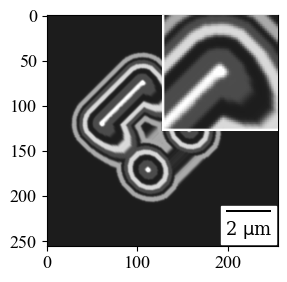

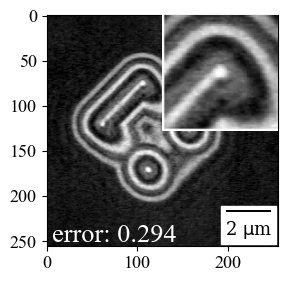

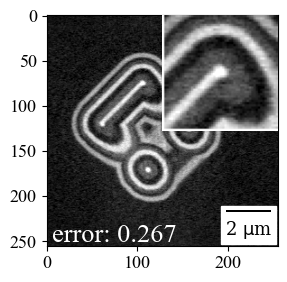

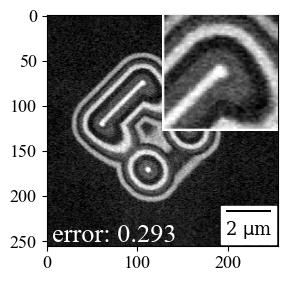

In [64]:

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

mshowfull(u[:,128+2])
plt.savefig(f'figs/u.png',dpi=300,bbox_inches='tight')
mshowfull(rec_c_180)
plt.savefig(f'figs/rec_cn_180.png',dpi=300,bbox_inches='tight')
mshowfull(rec_c_360)
plt.savefig(f'figs/rec_cn_360.png',dpi=300,bbox_inches='tight')
mshowfull(rec_c_540)
plt.savefig(f'figs/rec_cn_540.png',dpi=300,bbox_inches='tight')

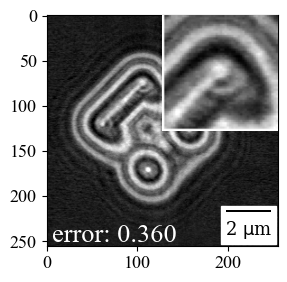

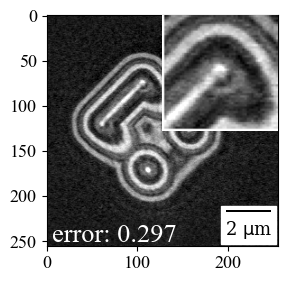

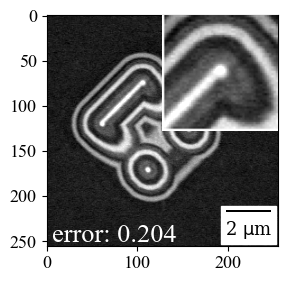

In [65]:
mshowfull(rec_1)
plt.savefig(f'figs/recn_1.png',dpi=300,bbox_inches='tight')
mshowfull(rec_2)
plt.savefig(f'figs/recn_2.png',dpi=300,bbox_inches='tight')
mshowfull(rec_3)
plt.savefig(f'figs/recn_3.png',dpi=300,bbox_inches='tight')